# GPs w. Uncertain Inputs

In [30]:
import os, sys
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
sys.path.insert(0, parent_dir) 

import numpy as np
from uncertain import SparseGPR
import GPy
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
rng = np.random.RandomState(0)

# Generate sample data
noise = 1.0
input_noise = .3
n_train = 500
n_test = 10_000
X = 15 * rng.rand(n_train, 1)

def f(x): return np.sin(x)

y = f(X)

X += input_noise * rng.randn(X.shape[0], X.shape[1])
y += noise * (0.5 - rng.rand(X.shape[0], X.shape[1]))  # add noise
X_plot = np.linspace(0, 20, n_test)[:, None]
X_plot += input_noise * rng.randn(X_plot.shape[0], X_plot.shape[1])
X_plot = np.sort(X_plot, axis=0)

In [32]:
def plot_results():
    # Plot results
    plt.figure(figsize=(10, 5))
    lw = 2
    plt.scatter(X, y, c='k', label='data')
    plt.plot(X_plot, np.sin(X_plot), color='navy', lw=lw, label='True')

    plt.plot(X_plot, y_gpr, color='darkorange', lw=lw,
             label='GPR' )
    plt.fill_between(X_plot[:, 0], 
                     (y_gpr - 2*y_std).squeeze(), 
                     (y_gpr + 2*y_std).squeeze(), color='darkorange',
                     alpha=0.2)
    plt.xlabel('data')
    plt.ylabel('target')
    plt.xlim(0, 20)
    plt.ylim(-4, 4)
    plt.title('GPR versus Kernel Ridge')
    plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
    plt.show()

### Sparse GP Model - No Uncertain Inputs

In [34]:
n_inducing = 10
inference = 'vfe'
X_variance = None
verbose = 1
max_iters = 1_000
n_restarts = 0


gpr_clf = SparseGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    max_iters=max_iters,
    inference=inference,
    X_variance=X_variance
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s05  0003   5.637828e+02   1.695510e+04 
    00s14  0011   2.548612e+02   1.060318e+03 
    00s19  0015   2.457955e+02   2.089472e+03 
    01s20  0246   2.275254e+02   2.302678e-01 
    01s83  0344   2.275165e+02   6.454024e-05 
Runtime:     01s83
Optimization status: converged - relative reduction in objective

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s14  0007   3.527647e+02   1.069860e+06 
    00s19  0010   2.398296e+02   1.077576e+05 
    00s29  0031   2.275165e+02   1.685567e-04 
Runtime:     00s29
Optimization status: converged - relative reduction in objective



{'inducing': <matplotlib.collections.PathCollection at 0x13f776d68>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x13f784278>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x13f7840b8>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x13f784908>]}

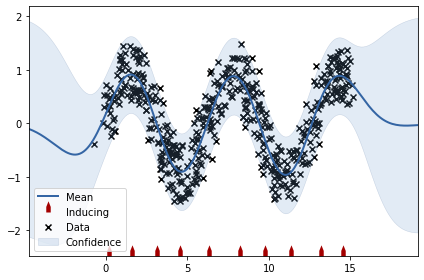

In [35]:
gpr_clf.gp_model.plot()

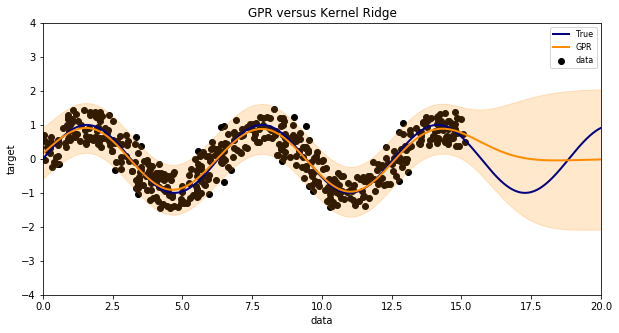

In [37]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

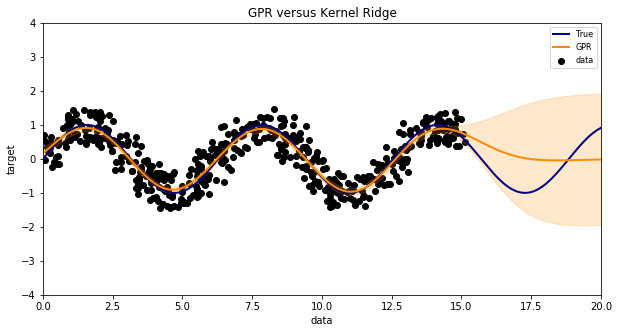

In [38]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()

### W. Uncertain Inputs

In [39]:
n_inducing = 10
inference = 'vfe'
X_variance = input_noise
verbose = 1
max_iters = 1_000
n_restarts = 0


gpr_clf = SparseGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    max_iters=max_iters,
    inference=inference,
    X_variance=X_variance
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s14  0009   3.670465e+02   1.059945e+03 
    00s19  0011   3.670465e+02   5.289623e+02 
    02s20  0299   3.628849e+02   2.244259e-02 
    02s85  0426   3.628807e+02   1.648330e-04 
Runtime:     02s85
Optimization status: converged - relative reduction in objective

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    00s00  0000   5.003929e+03   1.648330e-04 
    00s12  0006   1.770873e+03   3.686213e+06 
    00s19  0011   4.197617e+02   3.782728e+04 
    00s38  0043   3.628807e+02   2.506083e-05 
Runtime:     00s38
Optimization status: converged - relative reduction in objective



{'inducing': <matplotlib.collections.PathCollection at 0x140221b70>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x140240048>],
 'input_error': [<ErrorbarContainer object of 3 artists>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x140221e80>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x14007b710>]}

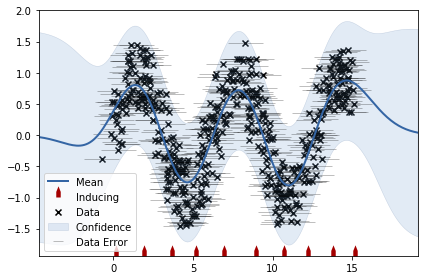

In [40]:
gpr_clf.gp_model.plot()

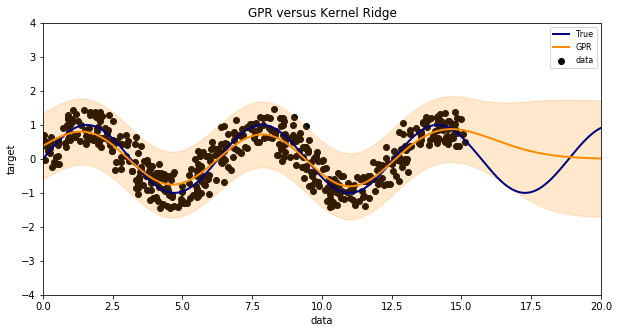

In [41]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

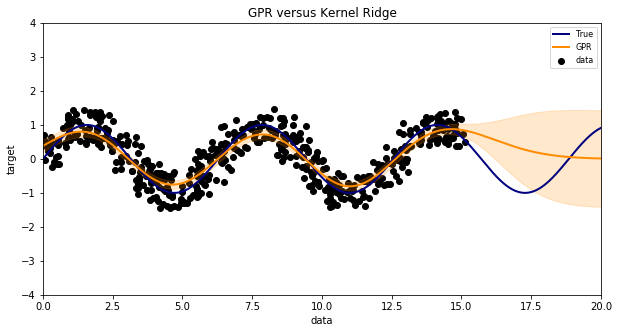

In [42]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()

### With MiniBatches

In [18]:
rng = np.random.RandomState(0)

# Generate sample data
noise = 1.0
input_noise = .3
n_train = 2_000
n_test = 10_000
X = 15 * rng.rand(n_train, 1)

def f(x): return np.sin(x)

y = f(X)

X += input_noise * rng.randn(X.shape[0], X.shape[1])
y += noise * (0.5 - rng.rand(X.shape[0], X.shape[1]))  # add noise
X_plot = np.linspace(0, 20, n_test)[:, None]
X_plot += input_noise * rng.randn(X_plot.shape[0], X_plot.shape[1])
X_plot = np.sort(X_plot, axis=0)

In [27]:
n_inducing = 100
inference = 'vfe'
X_variance = input_noise
verbose = 1
max_iters = 1_000
n_restarts = 0
batch_size = 50


gpr_clf = SparseGPR(
    verbose=verbose, 
    n_restarts=n_restarts,
    n_inducing=n_inducing,
    max_iters=max_iters,
    inference=inference,
    X_variance=X_variance,
    batch_size=batch_size
)

gpr_clf.fit(X, y);

Running Scaled Conjugate Gradients Code:
  runtime   i      f              |g|        
    03s96  0005   7.917260e+04   3.914150e+05 
    15s10  0019   7.639226e+04   1.498893e+05 
    45s25  0057   6.044750e+04   2.346186e+05 
 01m14s75  0092   2.880498e+12   5.476845e+04 

 /Users/eman/anaconda3/envs/sci_py36/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:131: RuntimeWarning:invalid value encountered in true_divide


 02m12s15  0164   1.163411e+04   4.777834e+04 
 02m21s77  0176   5.288934e+10   1.148983e+05 
 02m25s03  0180   4.959274e+03   9.493106e+04 
 03m01s40  0226   2.826400e+03   1.392833e+03 
 04m51s53  0362   2.491548e+03   3.869001e+02 
 06m05s11  0433   2.332166e+03   2.496097e+02 
 08m05s96  0558   2.327922e+03   3.666404e-01 
Runtime:  08m05s96
Optimization status: None

KeyboardInterrupt caught, calling on_optimization_end() to round things up


KeyboardInterrupt: 

In [28]:
gpr_clf.display_model()

AttributeError: 'SparseGPR' object has no attribute 'gp_model'

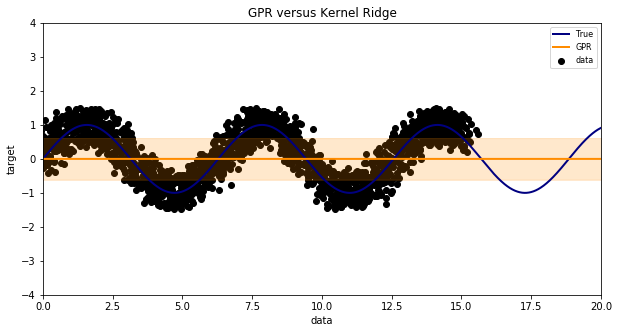

In [24]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=False)
plot_results()

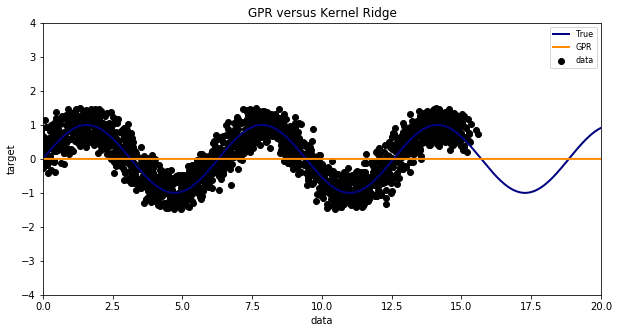

In [25]:
y_gpr, y_std = gpr_clf.predict(X_plot, return_std=True, noiseless=True)
plot_results()

In [7]:
max_iters=200
optimize=True
plot=True

Running Scaled Conjugate Gradients Code:
  runtime   i     f              |g|        
    00s00  000   2.317503e+01           nan 
    00s07  008   1.244649e+05   4.193235e+01 
    00s18  019  -1.160966e+01   3.427038e+01 
    00s51  142  -1.435044e+01   2.884195e-05 
Runtime:     00s51
Optimization status: converged - relative reduction in gradient


Name : sparse_gp
Objective : -14.350441548798926
Number of Parameters : 10
Number of Optimization Parameters : 10
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (7, 1)  |               |        
  rbf.variance             |     1.2280981799942758  |      +ve      |        
  rbf.lengthscale          |     1.9083598974613944  |      +ve      |        
  Gaussian_noise.variance  |  0.0029093489358147065  |      +ve      |        
Running Scaled Conjugate Gradients Code:
  runtime   i     f              |g|        
    00s04  006   1.89536

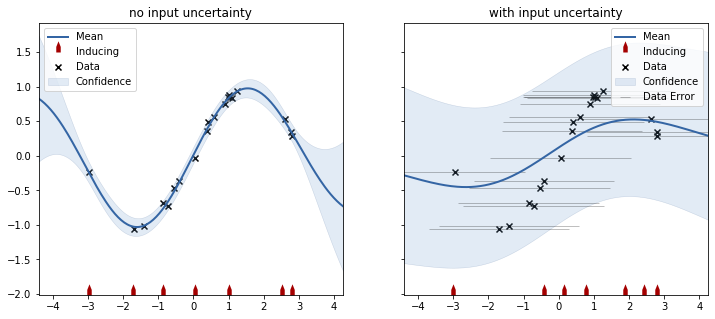

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# sample inputs and outputs
S = np.ones((20, 1))
X = np.random.uniform(-3., 3., (20, 1))
Y = np.sin(X) + np.random.randn(20, 1) * 0.05
# likelihood = GPy.likelihoods.Gaussian(Y)
Z = np.random.uniform(-3., 3., (7, 1))

k = GPy.kern.RBF(1)
# create simple GP Model - no input uncertainty on this one
m = GPy.models.SparseGPRegression(X, Y, kernel=k, Z=Z)

if optimize:
    m.optimize('scg', messages=1, max_iters=max_iters)

if plot:
    m.plot(ax=axes[0])
    axes[0].set_title('no input uncertainty')
print(m)

# the same Model with uncertainty
m = GPy.models.SparseGPRegression(X, Y, kernel=GPy.kern.RBF(1), Z=Z, X_variance=S)
if optimize:
    m.optimize('scg', messages=1, max_iters=max_iters)
if plot:
    m.plot(ax=axes[1])
    axes[1].set_title('with input uncertainty')
    fig.canvas.draw()

print(m)